In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Start of Assignment


In [18]:
bat_data = pd.read_csv('batavgs.csv')
bat_data.head()

,batsman,batsman_runs,ball,matches,Avg,StrikeRate
0,A Symonds,973,734,36,27,133
1,AB de Villiers,3460,2296,118,29,151
2,AC Gilchrist,2046,1438,80,26,142
3,AD Russell,574,325,25,23,177
4,AJ Finch,1601,1186,64,25,135


## Do HC across Avg and Strike Rate

In [19]:
#X = bat_data[avgcond].iloc[:, [5, 4]].values
X = bat_data.iloc[:, [4, 5]].values
X_names = bat_data.iloc[:, [0]].values
#X_names

## Do a K Means Clustering

In [20]:
from sklearn.cluster import KMeans
%matplotlib inline

### Original Cluster

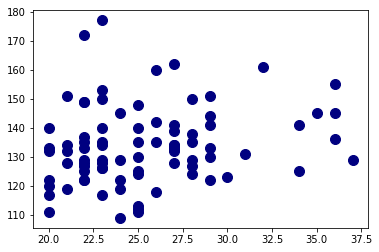

In [21]:
plt.scatter(X[:,0], X[:, 1], s = 100, c = 'navy', label = 'Cluster')

## Scale the X values

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X.mean(axis=0)

C:\Users\Pramod Jaiswal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([ 25.44047619, 133.92857143])

## calculate WCSS & Display Elbow Graph

167.99999999999997
102.27989868790999
66.41586428062817
46.72204545506355
36.351342671128535
30.810432244253278
24.96462339158344
22.27505426730491
18.107315443439425
14.956279033569654


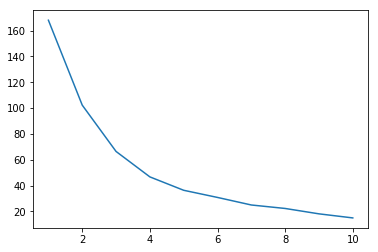

In [23]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=2, max_iter=300, init='k-means++', n_init=10)
    kmeans.fit(X_scaled)
    print(kmeans.inertia_)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.show()    

In [13]:
# For 5 Clusters to K means and reverse scale the cluster centers
kmeans=KMeans(n_clusters=5,random_state=42, max_iter=300, init='k-means++', n_init=10)
y_kmeans=kmeans.fit_predict(X_scaled)
kmeans.cluster_centers_= scaler.inverse_transform(kmeans.cluster_centers_)

## Visualize the Clusters

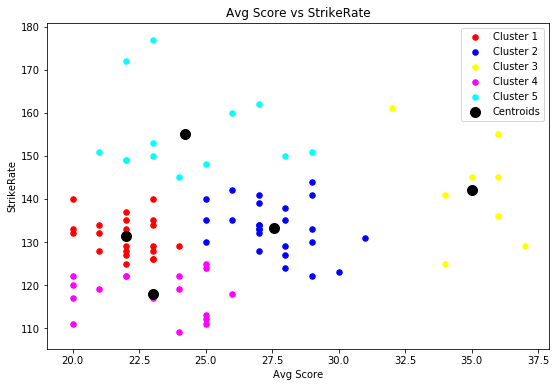

In [14]:
%matplotlib inline
plt.subplots(figsize=(9,6))
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s=30, c='red',label='Cluster 1')
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s=30, c='blue',label='Cluster 2')
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], s=30, c='yellow',label='Cluster 3')
plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1], s=30, c='magenta',label='Cluster 4')
plt.scatter(X[y_kmeans==4,0], X[y_kmeans==4,1], s=30, c='cyan',label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black',label='Centroids')
plt.title('Avg Score vs StrikeRate')
plt.xlabel('Avg Score')
plt.ylabel('StrikeRate')
plt.legend()
plt.show()

In [15]:
# 5 Cluster - Scaled - With Names

kmeans=KMeans(n_clusters=5,random_state=42, max_iter=300, init='k-means++', n_init=10)
y_kmeans=kmeans.fit_predict(X_scaled)
kmeans.cluster_centers_ = scaler.inverse_transform(kmeans.cluster_centers_)

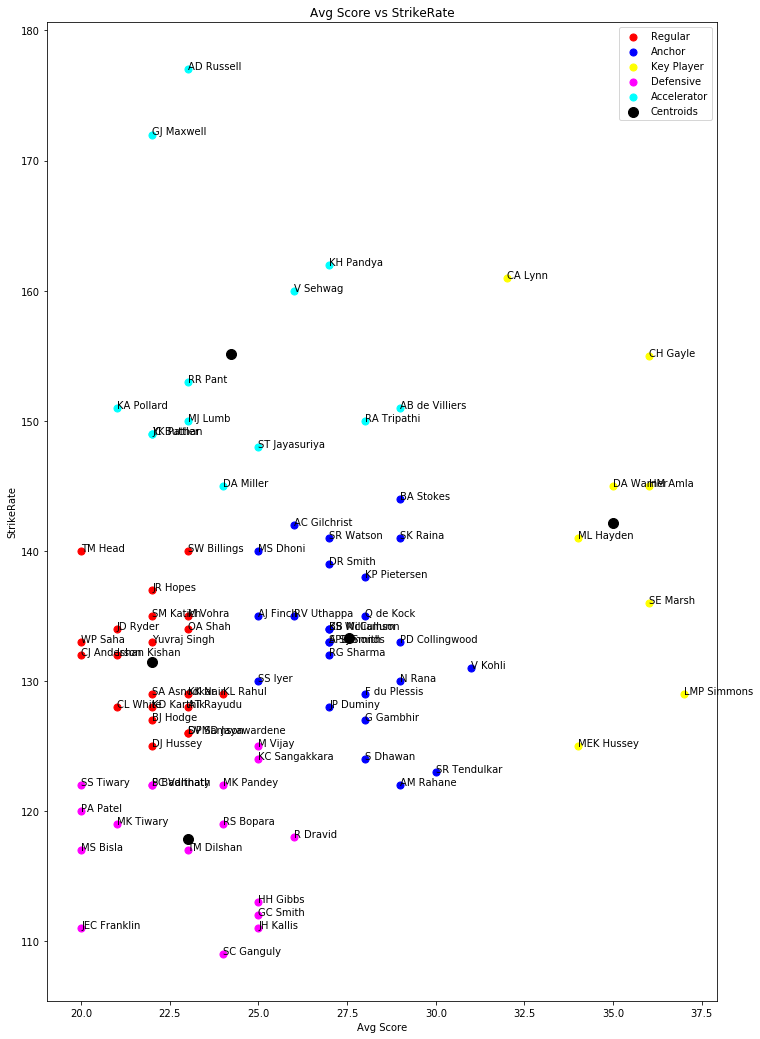

In [16]:
%matplotlib inline
plt.subplots(figsize=(12,18))
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s=50, c='red',label='Regular')
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s=50, c='blue',label='Anchor')
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], s=50, c='yellow',label='Key Player')
plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1], s=50, c='magenta',label='Defensive')
plt.scatter(X[y_kmeans==4,0], X[y_kmeans==4,1], s=50, c='cyan',label='Accelerator')

cnt=0
#For names -----------
for x1,y1 in enumerate (X):
    plt.annotate(str(X_names[cnt][0]), (y1[0],y1[1]) )
    cnt=cnt+1
#---------------------------    
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black',label='Centroids')
plt.title('Avg Score vs StrikeRate')
plt.xlabel('Avg Score')
plt.ylabel('StrikeRate')
plt.legend()
plt.show()